# K-fold Cross Validation Analysis

In [1]:
!unzip results.zip

Archive:  results.zip
   creating: IMDBBINARY/results/
  inflating: IMDBBINARY/results/blocks1_layers3_sum_uniform_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks3_layers2_jkn_uniform_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks2_layers1_jkn_degree_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks2_layers2_jkn_degree_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks3_layers1_sum_uniform_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks1_layers2_sum_degree_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks1_layers1_jkn_degree_normalized_results.csv  
   creating: IMDBBINARY/results/.ipynb_checkpoints/
  inflating: IMDBBINARY/results/blocks2_layers3_jkn_uniform_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks2_layers2_sum_degree_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks2_layers2_jkn_uniform_normalized_results.csv  
  inflating: IMDBBINARY/results/blocks3_layers2_

Package imports.

In [37]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-whitegrid')

Read all files and extract the best results for each model.

In [19]:
RESULTS_PATH = 'IMDBBINARY/results'

filenames = [f for f in os.listdir(RESULTS_PATH) if f.endswith('_results.csv')]

results = []

for filename in filenames:
    # Read the experiments and obtain
    res = pd.read_csv(f'{RESULTS_PATH}/{filename}')
    max_value = res['accuracy_mean'].max()
    res = res[res['accuracy_mean'] == max_value].to_dict(orient='records')[0]
    # Disect the filename to obtain model parameters
    filename = filename[:-12]
    res['blocks'] = filename.split('_')[0].lstrip('blocks')
    res['layers'] = filename.split('_')[1].lstrip('layers')
    res['readout'] = filename.split('_')[2]
    res['scaling'] = filename.split('_')[3]
    results.append(res)

results = pd.DataFrame(results)
results

,C,accuracy_mean,accuracy_std,train_time_mean,score_time_mean,blocks,layers,readout,scaling
0,240.409918,0.735,0.036125,0.138673,0.016163,1,3,jkn,uniform
1,10000.000000,0.749,0.024678,2.351359,0.017064,3,1,sum,uniform
2,8030.857221,0.742,0.030265,0.627105,0.017218,3,1,sum,degree
3,8030.857221,0.742,0.031241,0.868626,0.016464,3,1,jkn,degree
4,10000.000000,0.742,0.030594,0.662362,0.017689,2,2,jkn,uniform
5,240.409918,0.735,0.036125,0.139091,0.017037,1,3,jkn,degree
6,240.409918,0.735,0.036125,0.140716,0.018054,1,2,jkn,degree
7,896.150502,0.750,0.025690,0.113276,0.016788,3,2,sum,uniform
8,3340.484984,0.734,0.026153,0.427611,0.016651,2,1,jkn,uniform
9,8030.857221,0.729,0.032388,0.960851,0.017345,2,1,jkn,degree


Best obtained results:

In [17]:
# Max mean accuracy
max_mean_score = results['accuracy_mean'].max()

display(results[results['accuracy_mean'] == max_mean_score].reset_index(drop=True))

,C,accuracy_mean,accuracy_std,train_time_mean,score_time_mean,blocks,layers,readout,scaling
0,1389.495494,0.755,0.029411,0.124981,0.016996,3,3,sum,uniform


Result analysis:

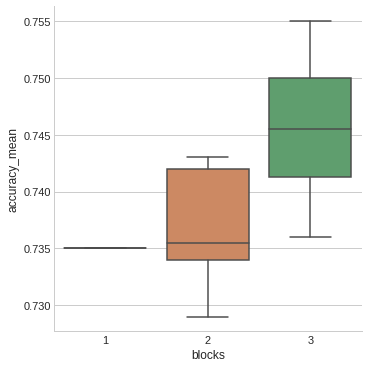

In [40]:
# Num blocks vs accuracy
sns.catplot(x='blocks', y='accuracy_mean', data=results, order=['1', '2', '3'], kind='box')

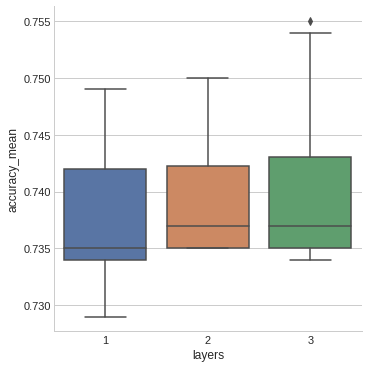

In [44]:
# Num blocks vs accuracy
sns.catplot(x='layers', y='accuracy_mean', data=results, order=['1', '2', '3'], kind='box')

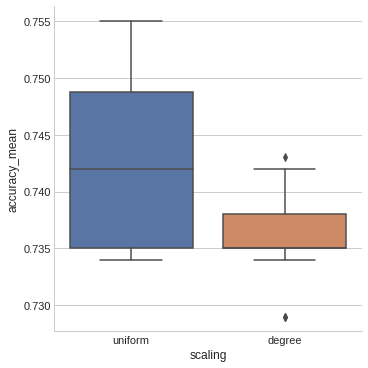

In [42]:
# Scaling factor vs accuracy
sns.catplot(x='scaling', y='accuracy_mean', data=results, kind='box')

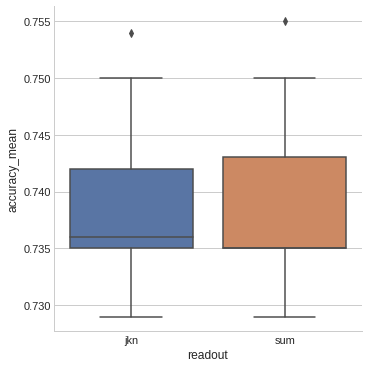

In [43]:
# Readout operation vs accuracy
sns.catplot(x='readout', y='accuracy_mean', data=results, kind='box')